### Heat Equation - 2D

\begin{equation} \frac{\partial u}{\partial t} = \alpha \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)
 \end{equation}

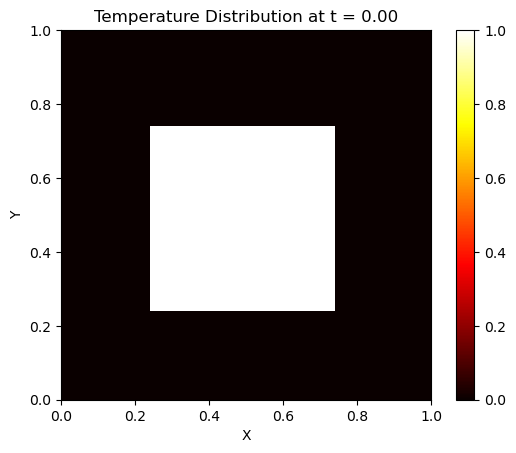

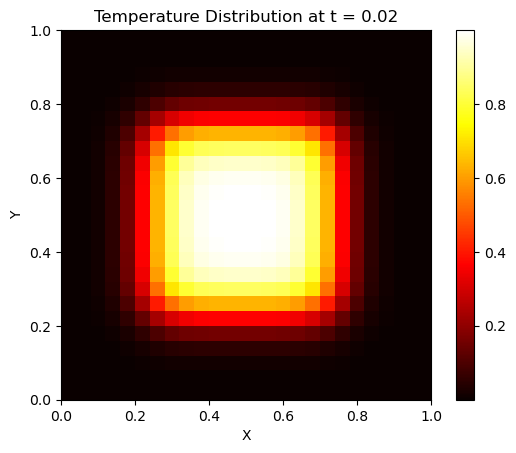

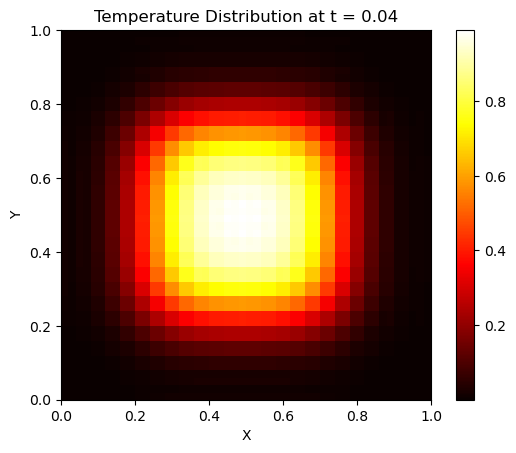

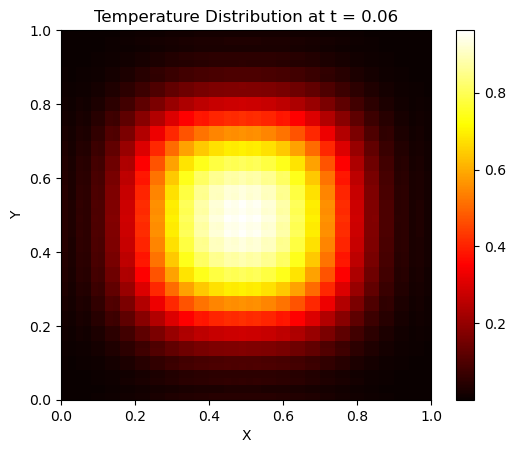

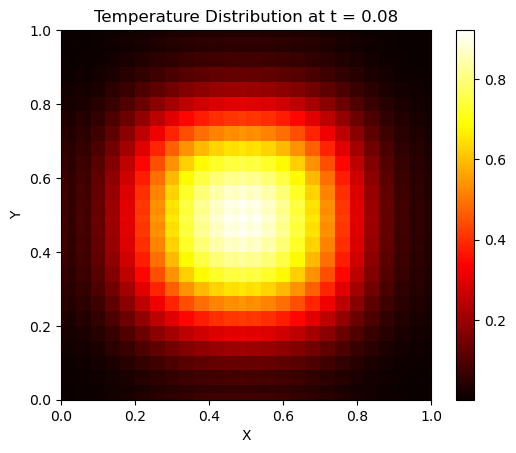

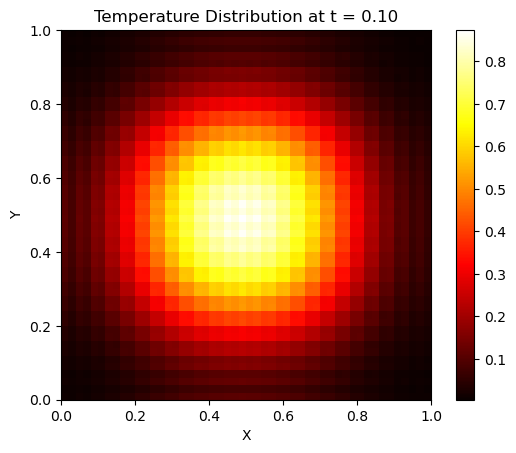

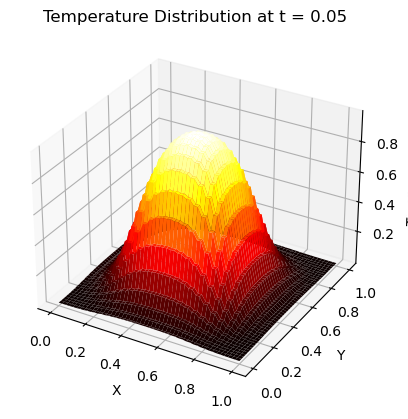

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters and grid
alpha = 0.1
Lx, Ly = 1.0, 1.0
Nx, Ny = 50, 50
dx, dy = Lx / Nx, Ly / Ny
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initial condition
u0 = np.zeros((Nx, Ny))

# Initial condition (e.g., a hot spot in the center)
u0[Nx // 4:3 * Nx // 4, Ny // 4:3 * Ny // 4] = 1.0


# Define the system of ODEs
def heat_equation(t, u):
    u = u.reshape(Nx, Ny)
    dudt = np.zeros_like(u)

    dudx = np.gradient(u, axis=0)/dx
    dudx[0] = 0   # boundary condition at x=0 on the top side of the grid
    dudx[-1] = 0  # boundary condition at x=Nx on the bottom side of the grid
    d2udx2 = np.gradient(dudx, axis=0)/dx

    dudy = np.gradient(u, axis=1)/dy
    dudy[0] = 0   # boundary condtion at y=0 on the left side of the grid
    dudy[-1] = 0  # boundary condition at y=Ny the right side of the grid
    d2udy2 = np.gradient(dudy, axis=1)/dy

    dudt = alpha * (d2udx2 + d2udy2)
    return dudt.ravel()

# Time span
t_span = (0, 0.1)

# Solve the PDE using solve_ivp
sol = solve_ivp(heat_equation, t_span, u0.ravel(), t_eval=np.linspace(*t_span, 101))

# Extract time steps and temperature data from the solution
times = sol.t
temperature_data = sol.y.reshape(Nx, Ny, -1)

# Plot the temperature distribution at different time steps
for i in range(0, temperature_data.shape[2], 20):  # Plot every 10th time step
    plt.figure()
    plt.imshow(temperature_data[:, :, i], extent=(0, Lx, 0, Ly), origin='lower', cmap='hot')
    plt.colorbar()
    plt.title(f'Temperature Distribution at t = {times[i]:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)

# Plot the surface at different at half time
time_test = len(times)//2
ax.plot_surface(X, Y, temperature_data[:, :, time_test], cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperature')
ax.set_title(f'Temperature Distribution at t = {times[time_test]:.2f}')

plt.show()